- title: Introduction to Machine Learning I
- date: 2020-05-15 12:00
- category: workshop
- tags: machine learning, python, course
- slug: machine_learn_intro_1
- authors: Julien Hernandez Lallement
- summary: Introduction to Machine Learning
- illustration: header_sales_prediction_other.jpg

## Background

This post is a repository of stuff I explain to folks who want to get into machine learning and data science. As always in the process of explaining, I realized I had some troubles explaining a few concepts, so started a repo to use easily when I needed to prepare a workshop or crashcourse for some colleagues.

There will probably be a few episodes added to this introduction eventually, so keep posted.

Here, I will:
- introduce machine learning fundamental concepts
- discuss classic machine learning algorithms

## General concepts

One definition of machine learning could be:

> "The field of study that allows computers to learn without being explicitly programmed." 

\- Arthur Samuel

In the last years, machine learning became a very fancy & hype word that, in the private sector, describes pretty much everything that involves data-driven approaches. 
In my opinion, machine learning is not much more than (mostly) decade old statistical concepts applied to data. And these applications also are quite old for most of the algorithms out there. <br>

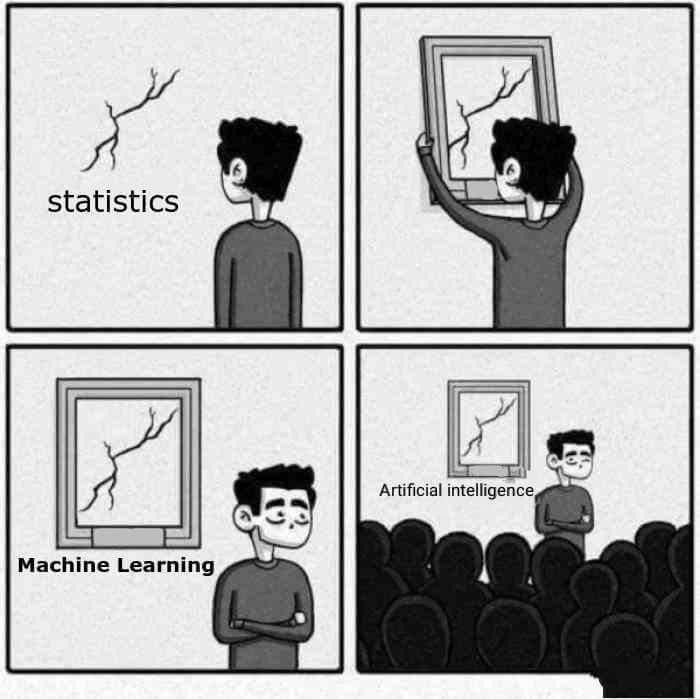

In [9]:
from IPython.display import Image
PATH = "/home/julien/website/content/images/2020_05_ML_Intro_I/"
Image(filename = PATH + "ML_hype.jpeg", width=500, height=500)

Probably one game changing factor was the emergence of **1)** high computing power combined with **2)** virtually illimited storage space on the cloud. The first one allowed to implement complex statistical techniques that were previously not possible (e.g., Bayesian statistics and modelling). The second one allowed large amounts of data to be accumulated and used to make predictions about the future. <br><br>

It should be noted that in academia, the machine learning algorithms used nowadays in the private sector have been used regularly for a while. While models need to be validated with real, empirical data in both private and academic sectors, one main difference I think is that in academia, datasets are (mostly) finite (experiments have an end, after which data is no more collected), while in the private sector, data flows in every day, and models are heavily challenged by novel trends in the data. On the other hand, in academia is that the model is fitted on a collected dataset, that does not grow in size and complexity anymore. Kind of a snapshop of a process at an instant t. Then paper is written, model is presented, and another group would validate or invalidate the model in a further study. Nothing wrong about that of course, it gets us closer to the truth. <br>

The way I see it, both environments and their Pros&Cons. Academic situation allows you to have a extremely clean data collected in well-controlled environment, hence getting you probably closer to a pure version of the process you are studying. On the other hand, a situation where data flows in constantly allows to collect increasing evidence and complexity of this process. <br><br>
But I am digressing...

## Learning machine


> "A computer program is said to learn from experience E with respect some class of tasks T and performance measure P , if its performance at tasks in T , as measured by P , improves with experience E." 

\- Tom Mitchell

Let's take an example: you want to classify which mails should land in the spam folder, and which should make it to your mailbox. The software would learn to solve this task `T`, if it's accuracy (or `performance P`) at classifying the spams correctly increases with increasing `experience E`.

In other words, when a relationship exists betwen variables in your dataset, a machine learning approach would allow you to capture them.

Let's say you have collected two variables in different subjects, or different time points. You can plot them to observe a possible relationship between them.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('darkgrid')
import statsmodels.api as sm


def illustrate_learning(a=1.3, b=0.5, n=30, r=1, make_prediction=False, random_lines=0, plot_errors=False):
    """
    This is a function I got from a introductory course I made some years ago in Amsterdam. 
    params: 
    a: slope
    b: intercept
    n: sample size
    r: error
    make_prediction: boolean. Does not make a real prediction, simply adds a value for illustrative purposes
    random_lines: plots random regression lines
    plot_errors: plot the difference between example points and regression line, for illustrative purposes
    """
    np.random.seed(42)
    def f(x, r_low=0, r_high=1): return (a * x + b + r * np.random.uniform(r_low, r_high, len(x)))

    x = np.random.rand(n)
    y = f(x)
    fig, ax = plt.subplots()
    ax.set_xlim([-0.05, 1.15])    
    # plot regression result
    sns.regplot(x, y, ci=None)
    # plot random lines, similar to the fitted regression result
    for _ in range(random_lines):
        sns.regplot(x, f(x, r_low=-1, r_high=2), ci=None, scatter=False)
    # make prediction with regression result
    if make_prediction:
        x_ = np.array(max(x) + 0.1).reshape(1,1) # funky
        plt.plot(x_, f(x_), 'ro')
    # plot largest two errors (positive and negative)
    if plot_errors:
        x_max, x_min = np.argmax(y - f(x)), np.argmin(y - f(x))
        X = sm.tools.add_constant(x)
        model = sm.OLS(y, X).fit()
        for i in [x_min, x_max]:
            plt.vlines(x[i], ymin=model.predict([1, x[i]]), ymax=y[i], linestyle='--', color='black', linewidth=0.9)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('f(x)', fontsize=15)
    plt.show()

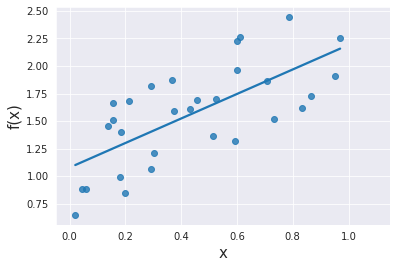

In [10]:
illustrate_learning()

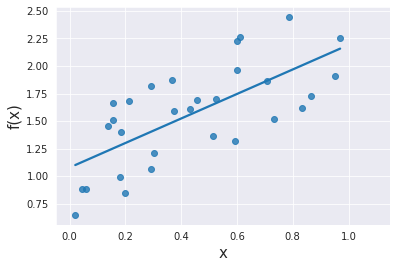

In [8]:
illustrate_learning()

Here, you can observe what would be called a `positive correlation` between the variables: there is a trend for x to increase when y increases as well. Now these relationships might be systematic, i.e., they might not be true for every data point in your set, but when visualizing many observations, the trend emerges. 

Once this trend is captured by a machine learning algorithm, you could start making predictions about what could be a possible outcome if you would be to f(x) for a yet unobserved value of x (red point in illustration below).

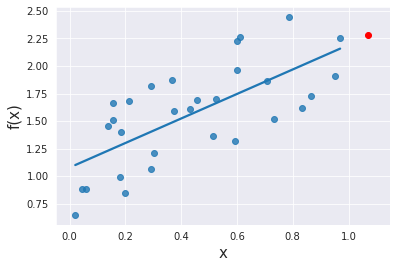

In [4]:
illustrate_learning(make_prediction=True)

Now, machine learning is based per se on past behavior, i.e., it requires past collected data to make predictions about what could the future look like. This is why it's quite hard to make predictions in very novel and unknown situations, since data is lacking... <br>
One famous sentence that you often hear in the field is "All models are wrong, but some are useful." (George E. P. Box). That sentenve captures in a nutshell the concept that the models we use to make predictions do not reflect the absolute truth of the process they aim at explaining. Real world is much more complex and noisy that what we are at the moment able to model, and our approximations will thus always be wrong. But getting accurate in predicting something, while measuing uncertainty if possible, can be very useful to make informed decisions.

> "All models are wrong, but some are useful." 

\- George E. P. Box

I remember the times back when I was doing research in neuroscience, the complexity of the processes at hand was often overwhelming. Trying to understand how decisions are taken from a brain activation patterns, or electrical activity collected in animals...The models applied to the data cannot, maybe for now, capture the 'real truth' of the processes we study. Our trained and learned models will always be wrong to some extend since they are an simplified version of truth. However, the observed relationships can be used to make inferences about how the world might work, and gets us a bit closer to the truth than we were before we looked at that data, and made that prediction.

This is why it is soooo important to understand your data. Garbage in, garbage out is one of the most important moto of data scientists, analysts and all other data profiles. Understanding where the data came from, what the limitations, the caveats, the missing data point are, is maybe the most important step when starting a machine learning project.

Below, I drew a flowchart of what a typical data science and machine learning project could look like:

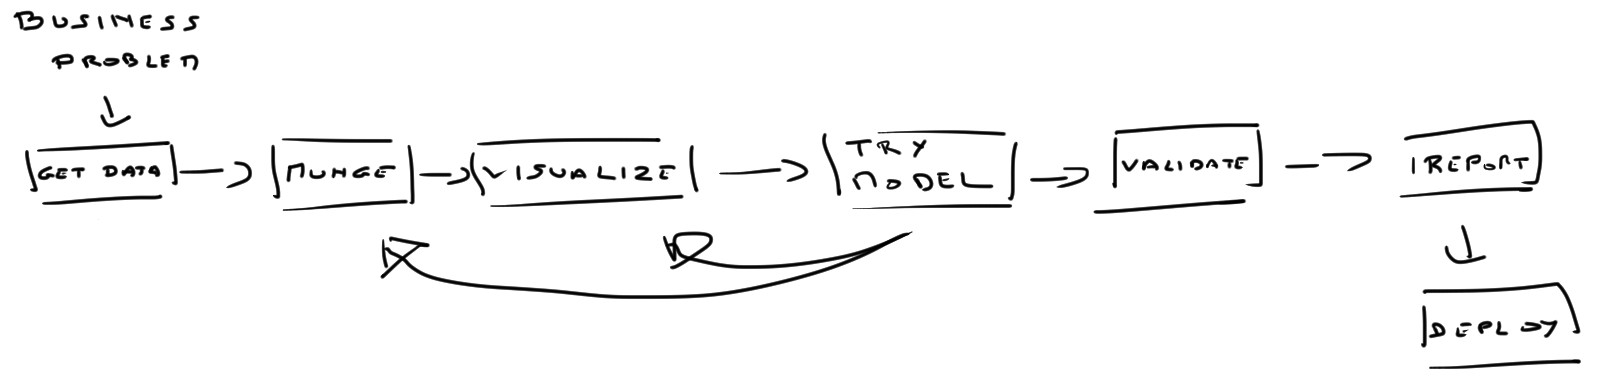

In [11]:
from IPython.display import Image
PATH = "/home/julien/website/content/images/2020_05_ML_Intro_I/"
Image(filename = PATH + "datascience_workflow_crop.jpg", width=800, height=500)

Based on this flow chart, a few core best practices emerge:
* Understand the business case: talk to all stakeholders, and make sure you understand most about the data as possible before you start digging into it. More questions will emerge, so make sure you get discuss regularly about what you see in the data.
* What I mentioned before: garbage in -> garbage out... ensure high data quality.
* Validate your model: we will discuss about this later on.
* Answer the problem at hand: make sure you undestand the **scope** of the project, and that your solution will address that objective.

While all of these points are very important in any data related project, I really want to emphasize the last point. It became apparent to me lately that many data specialist are providing solutions, sometimes very elegant, that are not addressing the initial problem described by the business. It is important to talk to the stakeholders and the people that will end up using your data product to really understand their needs. It is not enough to provide a model that predicts sales if what was asked was to improve sales. Furthermore, sometimes what is actually asked might be the elephant in the room but not the best approach. As a data specialist, I think your job also lies there, in filling that gap between tech and non tech profiles, and making sure everyone is aligned on the product you will be building.<br>
Thus, talk to the the stakeholders, and come back often to the business problem to make sure you are not going side ways!

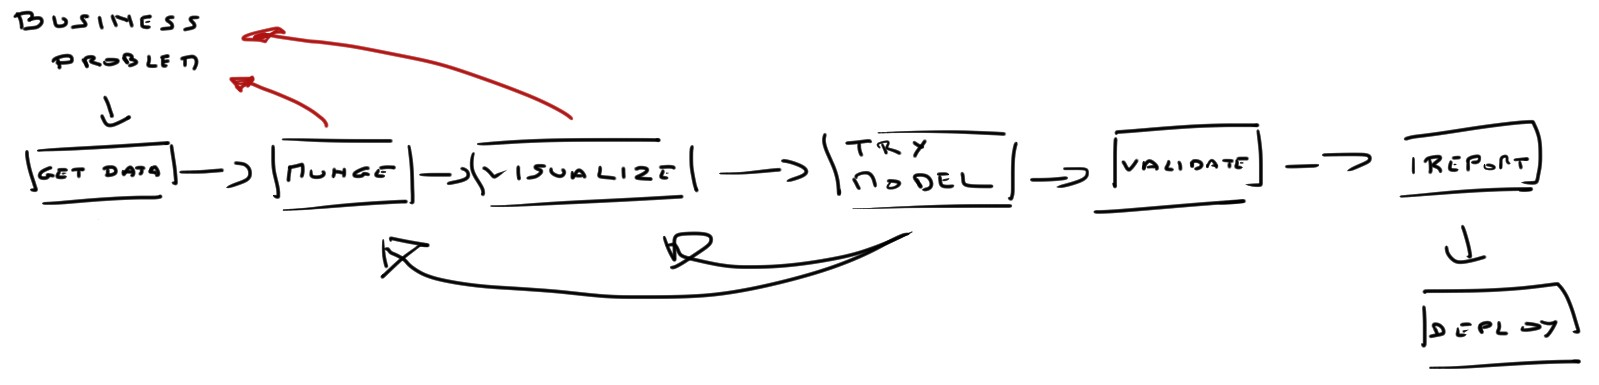

In [12]:
from IPython.display import Image
PATH = "/home/julien/website/content/images/2020_05_ML_Intro_I/"
Image(filename = PATH + "datascience_workflow2_crop.jpg", width=800, height=500)

## Your First Machine Learning Problem

The substrate of every machine learning problem is data. 

Data can take various shape, but let's start with what computers digest easily: numbers.

In [6]:
# Set seed for reproduction
np.random.seed(41)
n_cols = 5 
n_rows = 10
# Define random data
x = pd.DataFrame(data=np.random.randint(1,100, (n_rows, n_cols)), columns=[f'feature{i}' for i in range(5)])
y = pd.DataFrame(data=np.random.randint(0, 2, n_rows), columns=['target'])
# Concatenate data in dataframe
pd.concat([x, y], axis=1)

,feature0,feature1,feature2,feature3,feature4,target
0,65,36,13,99,81,1
1,66,90,24,86,27,0
2,57,4,36,51,71,1
3,85,87,62,52,93,0
4,89,76,93,53,56,1
5,18,99,82,29,54,1
6,20,14,62,96,35,1
7,59,5,60,2,77,1
8,13,36,5,70,21,1
9,6,45,23,35,47,0


To use a few famous examples from the data science community, the value in the table above could be:
* prices from houses in the Boston area
* the age of passengers on the titanic
* pixel intensities (coming from pictures, for classification purposes).

You notice that the y column contains binary data, that could be whether the house was purchased or not, whether the passenged died or survived, or whether the image was classified in the first or second image category.

Let's look at a first year data science problem: predicting continous numerical data, a problem that can be addressed with linear regression.

As you probably remember from your early math course, each line can be defined by a slope $\mathbf{a}$ and an intercept parameter $\mathbf{b}$:

$$ y = \mathbf{a} x + \mathbf{b} (1)$$

You can then add so-called 'weights' $\mathbf{w}$ to the equation, which will affect how each parameter will behave:

$$ y(\mathbf{w}, \mathbf{x}) = w_0 + w_1 x_1 (+ w_2 x_2 + ...) (2)$$


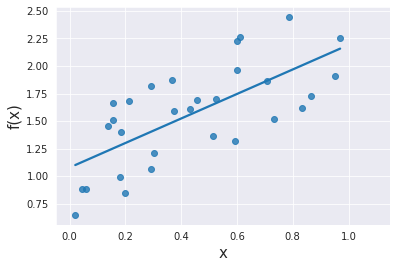

In [16]:
illustrate_learning()

The slope defines the actual slope of the line you see in the plot above, while the intercept defines the point where the slope and the y axis meet

Question is, how do we define this line? How do we maximize the parameters so that the line captures the most variance in the data, maximizing the information we extract from each data point?

One could think of drawing many different lines, each better capturing a particular sub-population of the plotted data

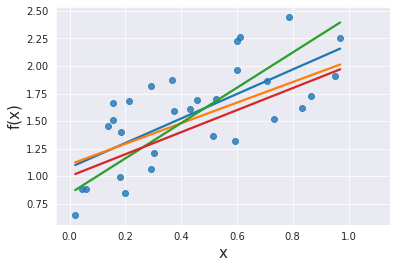

In [17]:
illustrate_learning(random_lines=3)

One way to capture a best fit for linear models is to use the `residuals`, which capture a measure of error between the actual data, and the plotted line.

We use the following notation:
* Prediction: $\hat{y}_i = y(\mathbf{w}, \mathbf{x}^i)$ 
* Residual: $e_i = y_i-\hat{y}_i$

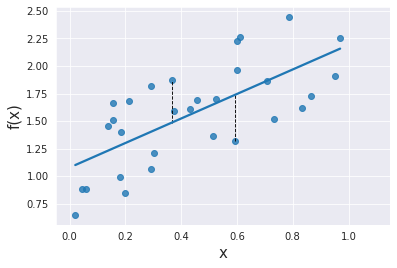

In [41]:
illustrate_learning(plot_errors=True)

The black lines represent the difference between what your model would predict, and the real values of the target you are aiming at predicting. Reducing these errors is what you should aim for, without falling into the issue of over-fitting which I will discuss in a follow-up post. In other words, we want to minimize the `residuals`.

Let's define a "cost" or "loss" function with the following properties:
- smaller for lower error
- larger for higher error

For example, let's take the Mean Squared Error (MSE) cost function:

$$ J(\mathbf{w})  
 = \frac{1}{n}\sum_{i=1}^n(y_i-y(\mathbf{w}, \mathbf{x}^i))^2        (3) $$
 

where: <br>
n = number of training examples<br>
$y_i$ = observed value<br>
$y(\mathbf{w}, \mathbf{x}^i)$ = predictions<br>

The MSE quantifies the average deviation of predicted values from the actual correct values. Conceptually, I can be explained in terms of model’s performance on the training set (the dataset fed to the data before assessing its generalization to unseen data). AS you can see from the equation, the cost is larger when the model is performing poorly on this data set. <br> 

One objective of the algorithm you would be using is to minimize the cost (term `J` in the equation above), by testing different parameters.

As you might have guessed, the cost function defined in equation 3 above has an so-called optimum, that is a parameter value that minimizes the cost quantity. In mathematical terms, the slope of the cost function with respect to one of the weights $ w_i $ is zero.

In the case of multiple features, the multi-dimensional slope (since we have more than one data feature that we use to predict data) is called a gradient.

One way to localize the optimum here would be to use the so-called gradient descent technique. Since the optimum can often not be found algebrically, we can use numerical approximation by "descending" the gradient. Gradient descent is an iterative algorithm, meaning that it will run many times. At every repetition, the value of the parameter (typically called $\theta$) to be tested is updated based on previous iteration (learning rate). <br><br>
The term descent refers to the ability of the algorithm to detect in which direction should the parameter be updated (since we want to find an optimum cost, i.e., the minimum value of the function, the parameter should be updated decreasingly of the slope is positive, and vice versa. Similarly, the algorithm is able to adapt the step size of parameter testing. For functions with high slopes, we want to take big steps in parameter value between each iteration, because we would be far from the optimum. One can also use the learning rate parameter to influence how big these steps should be.<br><br>

The learning rate is a quite important parameter, that should be decided wisely. If your learning rate is too small, and your cost functions has different `local minima` (see figure below), you might be trapped in one of these, since your gradient descent algorithm won't be able to detect the `global minima`. On the other hand, if your learning rate is too high, you would be jumping along your cost function, and won't find the of so desired optimum.

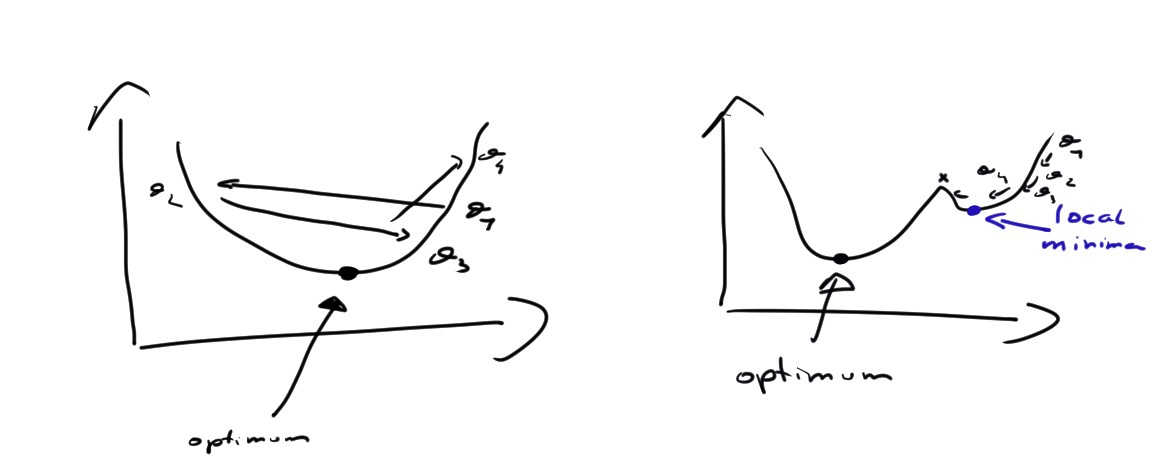

In [13]:
from IPython.display import Image
PATH = "/home/julien/website/content/images/2020_05_ML_Intro_I/"
Image(filename = PATH + "learning_rates2.jpg", width=800, height=500)

## Underfitting vs. Overfitting

Once you have managed to find the optimum for the cost function, you might have at hand a model that is quite good at predicting data. However, as mentioned before, the residuals typically are calculated on training sets, that is, data that you give the model for it learn the association between the variables. One trap here is to create models that are extremes, that is, they will not generalize well to unseen data because of the way they were trained or programed. <br><br>

This is a very important concept, that will define whether your models will be useful or not 

I insist again: the learned model is only useful if it is able to generalize from the data and allows for prediction.
In other words, a good model shoud
- **only** estimate the **systematic relationships** $f$ in the data
- **ignore** the **random noise** in the data, hence, unsystematic error 

Look at the figure below.<br>

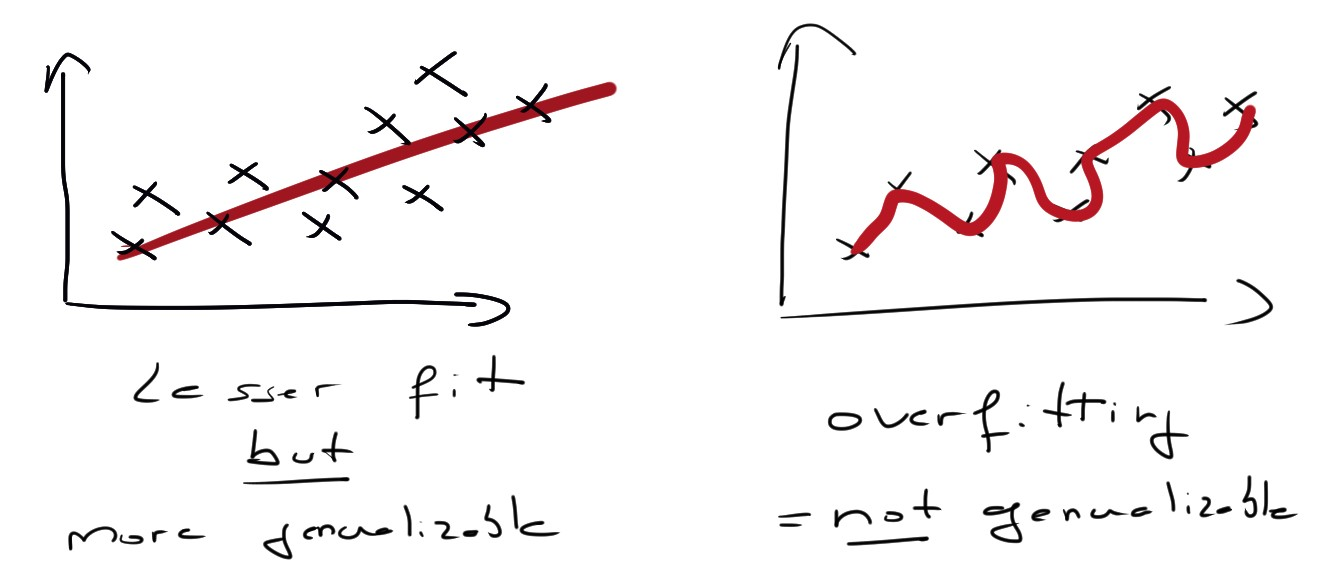

In [14]:
from IPython.display import Image
PATH = "/home/julien/website/content/images/2020_05_ML_Intro_I/"
Image(filename = PATH + "fitting_regimes_crop.jpg", width=800, height=500)

It might be unintuitive for novices in the field, but the model on the right is not a good model to use, because it is too fitted (overfitted) to the train data, and won't be able to capture systematic association between the variables, because too busy capturing the small irrelevant fluctuations present in your current training dataset. The model on the left however might be less accurate on that particular dataset, but will most likely be better at predicting unseen data 

What every engineer and scientist wants is an accurate model that generalizes well on unseen data. The model's performance can be quantified as a value that will be located on a continuum between two extreme cases:
* Underfitting: the model cannot learn the problem. 
* Overfitting:  the model doesn't generalize.

Underfitting means that the model cannot learn the assiciation between variables and target data, maybe because it is missing some features, maybe simply because the model is too simple.

Overfitting means that the model doesn't generalize wel, maybe because the model learns to recognize patterns in the data without detecting the intrisic patterns in it, which in turn makes it completely able to detect noise specific to your dataset and unable to detect trends specific to the overall data population from which your sample is taken.

### Final words

That's it for now. In following posts, I will be reporting how I showed and explained futher steps of machine learning project such as model fitting, evaluation and selection. Keep posted!